In [1]:
# Import packages
import os
import sys
import datetime
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration

In [2]:
# Set date timestamps for historical data download
start_date = datetime.datetime(2010, 1, 1).date()
end_date = datetime.datetime.now().date()
start_date, end_date

(datetime.date(2010, 1, 1), datetime.date(2020, 8, 23))

In [3]:
end_date - start_date

datetime.timedelta(days=3887)

In [4]:
ticker = "GOOGL"
# ticker = "MSFT"
# ticker = "FB"

In [5]:
msft = yf.Ticker(ticker)

msft

yfinance.Ticker object <GOOGL>

In [6]:
msft.info

{'zip': '94043',
 'sector': 'Communication Services',
 'fullTimeEmployees': 127498,
 'longBusinessSummary': 'Alphabet Inc. provides online advertising services in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It offers performance and brand advertising services. The company operates through Google and Other Bets segments. The Google segment offers products, such as Ads, Android, Chrome, Google Cloud, Google Maps, Google Play, Hardware, Search, and YouTube, as well as technical infrastructure. It also offers digital content, cloud services, hardware devices, and other miscellaneous products and services. The Other Bets segment includes businesses, including Access, Calico, CapitalG, GV, Verily, Waymo, and X, as well as Internet and television services. Alphabet Inc. was founded in 1998 and is headquartered in Mountain View, California.',
 'city': 'Mountain View',
 'phone': '650-253-0000',
 'state': 'CA',
 'country': 'United States',
 'c

In [7]:
historical_data = msft.history(start=start_date, end=end_date, interval="1d").reset_index()

historical_data.shape

(2679, 8)

In [8]:
historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2009-12-31,312.69,313.01,310.30,310.30,2437100,0,0.0
1,2010-01-04,313.79,315.07,312.43,313.69,3908400,0,0.0
2,2010-01-05,313.90,314.23,311.08,312.31,6003300,0,0.0
3,2010-01-06,313.24,313.24,303.48,304.43,7949400,0,0.0
4,2010-01-07,305.01,305.31,296.62,297.35,12815700,0,0.0


The above data shows stock prices on per day basis.

+ High: Max stock price on that particular day
+ Low: Lowest price went on that particular day
+ Open: Stock price opening on that particular day
+ Close: Final closing price of the stock on that particular day
+ Volume: Amount of stock traded on that day
+ Dividends: Dividens given (if any)
+ Stock Splits: Stock split happend on that particular day (if any)

In [9]:
historical_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2679.000000,2679.000000,2679.000000,2679.000000,2.679000e+03,2679.0,2679.000000
mean,696.466558,702.655006,689.932647,696.549194,3.311138e+06,0.0,0.000746
std,364.876703,368.678913,361.285533,365.290921,2.626416e+06,0.0,0.038602
min,219.370000,221.360000,217.030000,218.250000,5.206000e+05,0.0,0.000000
25%,332.840000,335.770000,330.240000,334.210000,1.545400e+06,0.0,0.000000
50%,591.730000,595.300000,587.450000,591.970000,2.387600e+06,0.0,0.000000
75%,1036.195000,1050.525000,1023.580000,1036.455000,4.352950e+06,0.0,0.000000
max,1585.030000,1591.880000,1562.310000,1576.250000,2.961990e+07,0.0,1.998000


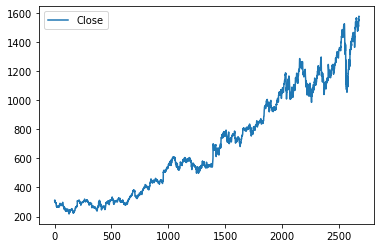

In [10]:
fig = plt.figure()

plt.plot(historical_data.Close)

plt.legend(["Close", "Open"])

# Feature Engineering

In [11]:
historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2009-12-31,312.69,313.01,310.30,310.30,2437100,0,0.0
1,2010-01-04,313.79,315.07,312.43,313.69,3908400,0,0.0
2,2010-01-05,313.90,314.23,311.08,312.31,6003300,0,0.0
3,2010-01-06,313.24,313.24,303.48,304.43,7949400,0,0.0
4,2010-01-07,305.01,305.31,296.62,297.35,12815700,0,0.0


In [12]:
# Create lag features
for i in range(1, 7):
    historical_data[f"Close_lag_{i}"] = historical_data.Close.shift(periods=i, axis=0)
    historical_data[f"Open_lag_{i}"] = historical_data.Open.shift(periods=i, axis=0)
    historical_data[f"High_lag_{i}"] = historical_data.High.shift(periods=i, axis=0)
    historical_data[f"Low_lag_{i}"] = historical_data.Low.shift(periods=i, axis=0)

historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_lag_1,Open_lag_1,...,High_lag_4,Low_lag_4,Close_lag_5,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6
0,2009-12-31,312.69,313.01,310.30,310.30,2437100,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-04,313.79,315.07,312.43,313.69,3908400,0,0.0,310.30,312.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-05,313.90,314.23,311.08,312.31,6003300,0,0.0,313.69,313.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-06,313.24,313.24,303.48,304.43,7949400,0,0.0,312.31,313.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-07,305.01,305.31,296.62,297.35,12815700,0,0.0,304.43,313.24,...,313.01,310.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
historical_data.fillna(0, inplace=True)
historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_lag_1,Open_lag_1,...,High_lag_4,Low_lag_4,Close_lag_5,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6
0,2009-12-31,312.69,313.01,310.30,310.30,2437100,0,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-01-04,313.79,315.07,312.43,313.69,3908400,0,0.0,310.30,312.69,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-01-05,313.90,314.23,311.08,312.31,6003300,0,0.0,313.69,313.79,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-01-06,313.24,313.24,303.48,304.43,7949400,0,0.0,312.31,313.90,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-01-07,305.01,305.31,296.62,297.35,12815700,0,0.0,304.43,313.24,...,313.01,310.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
historical_data.drop(
    columns=["Dividends", "Stock Splits", "Volume", "Open", "High", "Low"], inplace=True)

In [15]:
# # Create a holiday dataframe
# min_date, max_date = historical_data.Date.min(), historical_data.Date.max()
# print("Min/Max dates:", min_date, max_date)

# date_range = pd.date_range(start=min_date, end=max_date)
# print("Date range:", date_range.min(), date_range.max())

# # Find dates not present in historical df - closed stock market holiday
# holiday_date_range = [d.date() for d in date_range if d not in historical_data.Date]
# holiday_date_range[:5]

In [16]:
# holidays = pd.DataFrame({
#     "holiday": "shutdown",
#     "ds": pd.to_datetime(holiday_date_range),
#     "lower_bound": 0,
#     "upper_bound": 1,
# })

# holidays.head()

# Modelling

## Facebook's Prophet: Single Timestep Forecasting

References: 
+ https://facebook.github.io/prophet/

In [17]:
import fbprophet as prophet

In [18]:
validation_period = 30 # 30 days

train, validation = historical_data.iloc[:-validation_period], historical_data.iloc[-validation_period:]

train.shape, validation.shape

((2649, 26), (30, 26))

In [19]:
train.head()

,Date,Close,Close_lag_1,Open_lag_1,High_lag_1,Low_lag_1,Close_lag_2,Open_lag_2,High_lag_2,Low_lag_2,...,High_lag_4,Low_lag_4,Close_lag_5,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6
0,2009-12-31,310.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-01-04,313.69,310.30,312.69,313.01,310.30,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-01-05,312.31,313.69,313.79,315.07,312.43,310.30,312.69,313.01,310.30,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-01-06,304.43,312.31,313.90,314.23,311.08,313.69,313.79,315.07,312.43,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-01-07,297.35,304.43,313.24,313.24,303.48,312.31,313.90,314.23,311.08,...,313.01,310.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train and Forecast

In [20]:
lag_features = [col for col in historical_data.columns if "lag" in col]

In [21]:
model = prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, seasonality_mode="additive")
for name in lag_features:
    model.add_regressor(name)

model.fit(df=train.rename(columns={"Date": "ds", "Close":"y"}))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
forecast = model.predict(validation[[col for col in validation.columns if col != "Close"]].rename(columns={"Date": "ds"}))

forecast.shape

(30, 94)

In [23]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Close_lag_1,Close_lag_1_lower,Close_lag_1_upper,Close_lag_2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-13,656.779315,1511.242487,1547.604374,656.779315,656.779315,352.009840,352.009840,352.009840,27.827100,...,59.971018,59.971018,59.971018,3.901252,3.901252,3.901252,0.0,0.0,0.0,1530.326162
1,2020-07-14,656.797009,1503.525395,1539.139361,656.797009,656.797009,340.950198,340.950198,340.950198,28.507248,...,60.571234,60.571234,60.571234,3.966537,3.966537,3.966537,0.0,0.0,0.0,1521.057190
2,2020-07-15,656.814703,1496.008974,1530.132024,656.814703,656.814703,344.514228,344.514228,344.514228,27.612193,...,61.040568,61.040568,61.040568,3.989946,3.989946,3.989946,0.0,0.0,0.0,1512.781479
3,2020-07-16,656.832397,1489.697516,1524.211775,656.832397,656.832397,342.870562,342.870562,342.870562,27.900630,...,60.624196,60.624196,60.624196,3.971896,3.971896,3.971896,0.0,0.0,0.0,1506.660234
4,2020-07-17,656.850091,1493.683956,1530.441626,656.850091,656.850091,342.061118,342.061118,342.061118,27.767608,...,60.080551,60.080551,60.080551,3.913400,3.913400,3.913400,0.0,0.0,0.0,1512.045898
5,2020-07-20,656.903173,1489.616457,1524.465581,656.903173,656.903173,342.858172,342.858172,342.858172,27.702100,...,59.971018,59.971018,59.971018,3.513434,3.513434,3.513434,0.0,0.0,0.0,1506.296044
6,2020-07-21,656.920867,1544.570638,1579.755549,656.920867,656.920867,362.264168,362.264168,362.264168,27.766605,...,60.571234,60.571234,60.571234,3.313684,3.313684,3.313684,0.0,0.0,0.0,1561.411803
7,2020-07-22,656.938561,1524.909497,1558.259818,656.938561,656.938561,358.993355,358.993355,358.993355,29.337129,...,61.040568,61.040568,61.040568,3.085870,3.085870,3.085870,0.0,0.0,0.0,1541.718203
8,2020-07-23,656.956255,1544.839739,1581.676478,656.956255,656.956255,362.681279,362.681279,362.681279,29.072422,...,60.624196,60.624196,60.624196,2.833519,2.833519,2.833519,0.0,0.0,0.0,1563.552263
9,2020-07-24,656.973949,1491.046076,1526.073524,656.973949,656.973949,342.816874,342.816874,342.816874,29.370885,...,60.080551,60.080551,60.080551,2.560343,2.560343,2.560343,0.0,0.0,0.0,1508.609393


### Visualize forecasts

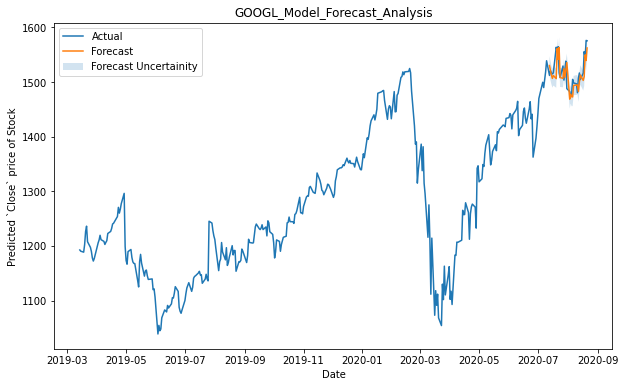

In [24]:
# Plotting predictions and uncertainity interval with respect to actuals
fig = plt.figure(figsize=(10, 6))

# Plot actuals
plt.plot(historical_data.Date.iloc[-365:], historical_data.Close.iloc[-365:])

# Plot forecasts for the latest 365 days as validation period
plt.plot(forecast.ds, forecast.yhat)

# Plot uncertainity - lower and upper bound for the forecasts
plt.fill_between(forecast.ds, forecast.yhat_lower, forecast.yhat_upper, alpha=0.2)

plt.xlabel("Date")
plt.ylabel("Predicted `Close` price of Stock")
plt.legend(["Actual", "Forecast", "Forecast Uncertainity"])
plt.title(f"{ticker}_Model_Forecast_Analysis")
plt.show()

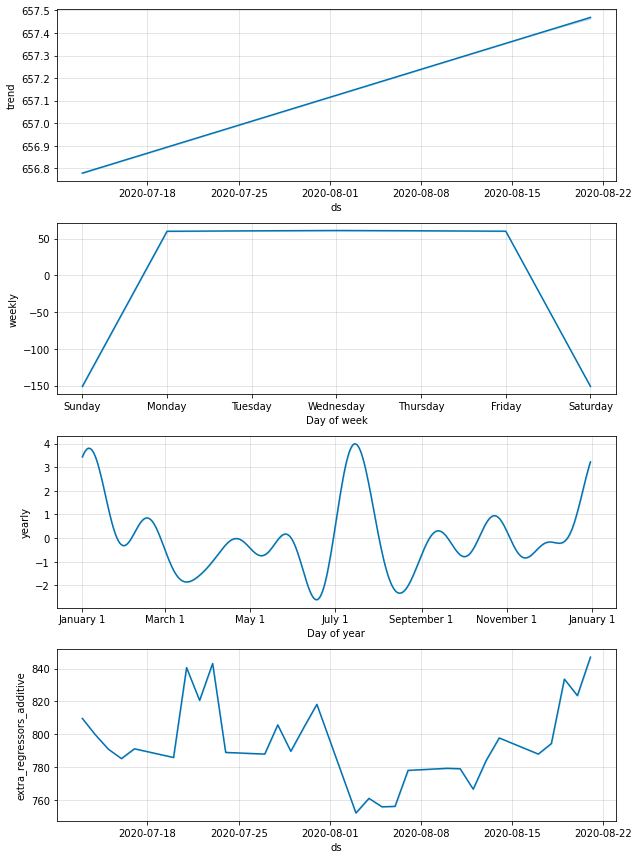

In [25]:
fig = model.plot_components(forecast)

### Evaluate model performance

In [26]:
# General metrics
from sklearn.metrics import mean_absolute_error

# Mean absolute error metric
def mae(y, yhat):
    return mean_absolute_error(y, yhat)

In [27]:
validation.Date.min(), validation.Date.max()

(Timestamp('2020-07-13 00:00:00'), Timestamp('2020-08-21 00:00:00'))

In [28]:
forecast.ds.min(), forecast.ds.max()

(Timestamp('2020-07-13 00:00:00'), Timestamp('2020-08-21 00:00:00'))

In [29]:
"Mean absolute error (Closing price of the stock) = ", mae(validation.Close, forecast.yhat)

('Mean absolute error (Closing price of the stock) = ', 17.75032078404112)